In [41]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv('scores_23_25.csv')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

df = df.sort_values(by='Date').reset_index(drop=True)

In [92]:
# splitting the 'C.R./Slope' column into two separate columns
df[['Course Rating', 'Slope Rating']] = df['C.R./Slope'].str.split('/', expand=True)
df['Course Rating'] = df['Course Rating'].astype(float)
df['Slope Rating'] = df['Slope Rating'].astype(float)

In [93]:
df.drop(columns=['C.R./Slope','Course','Stats','PCC'], inplace=True)
df.rename(columns={'Differential': 'Course'}, inplace=True)
df.rename(columns={'info': 'Differential'}, inplace=True)

In [94]:
# convert score to numeric and create new column for H and A after score 
df['Score Numeric'] = df['Score'].str.extract('(\d+)').astype(float)
df['Home/Away'] = df['Score'].str.extract('([HA])')

df['Home/Away'].fillna('A', inplace=True)

df.drop(columns=['Score'], inplace=True)

C:\Users\kolkd\AppData\Local\Temp\ipykernel_36392\3823481719.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Home/Away'].fillna('A', inplace=True)


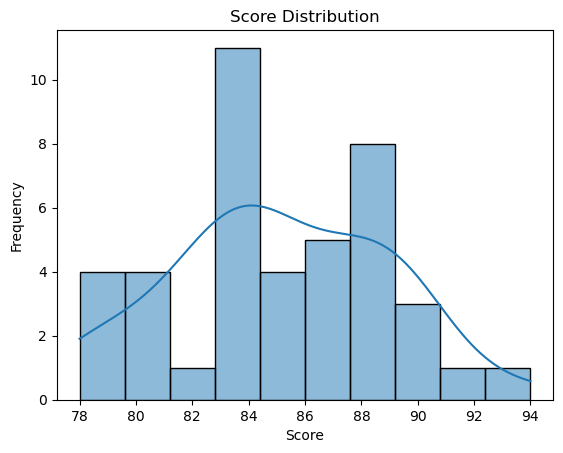

In [96]:
# normality check
sns.histplot(df['Score Numeric'], kde=True, bins=10)
plt.title("Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

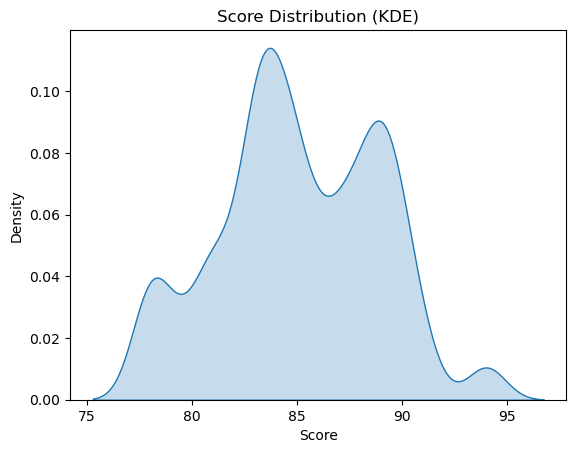

In [98]:
# checking kde as well
sns.kdeplot(df['Score Numeric'], fill=True, bw_adjust=0.5)
plt.title("Score Distribution (KDE)")
plt.xlabel("Score")
plt.ylabel("Density")
plt.show()


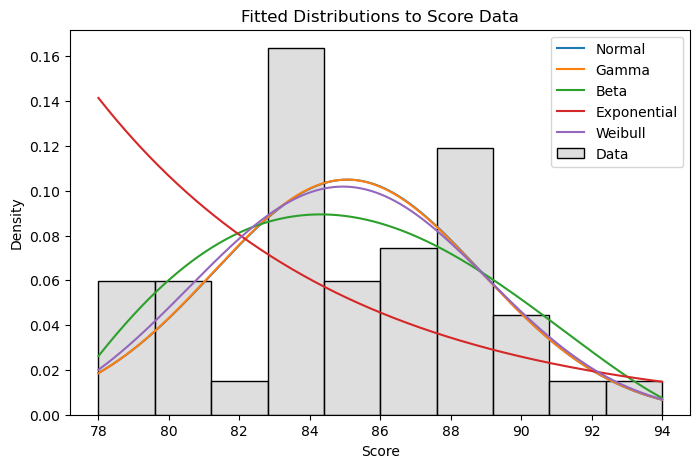

Normal: {'params': (85.07142857142857, 3.800957630856285), 'KS_stat': 0.08901695064341775, 'KS_p': 0.8640508732792687}
Gamma: {'params': (35308.871108378364, -629.1898365207021, 0.020228937739102226), 'KS_stat': 0.08924374630821363, 'KS_p': 0.8620873638430859}
Beta: {'params': (2.121723751734808, 2.6262010358678465, 76.6709720304565, 18.696064178874373), 'KS_stat': 0.11916192095622649, 'KS_p': 0.5498751791868264}
Exponential: {'params': (78.0, 7.071428571428569), 'KS_stat': 0.292627806981126, 'KS_p': 0.0011101971780426156}
Weibull: {'params': (3.1036126142789637, 74.45028607392393, 11.888162710556443), 'KS_stat': 0.08767639486196302, 'KS_p': 0.8754067367489005}


In [ ]:
# checking other distributions 

scores = np.array(df['Score Numeric'], dtype=float)

distributions = {
    "Normal": stats.norm,
    "Gamma": stats.gamma,
    "Beta": stats.beta,
    "Exponential": stats.expon,
    "Weibull": stats.weibull_min
}

# Fit distributions and compute KS test results
fit_results = {}
x = np.linspace(min(scores), max(scores), 1000)

plt.figure(figsize=(8, 5))
sns.histplot(scores, kde=False, bins=10, color='lightgray', stat="density", label="Data")

for name, dist in distributions.items():
    try:
        params = dist.fit(scores)
        ks_stat, ks_p = stats.kstest(scores, lambda x: dist.cdf(x, *params))
        fit_results[name] = {"params": params, "KS_stat": ks_stat, "KS_p": ks_p}
        plt.plot(x, dist.pdf(x, *params), label=name)  # Plot fitted PDF
    except Exception as e:
        fit_results[name] = {"error": str(e)}

plt.title("Fitted Distributions to Score Data")
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend()
plt.show()

# Print fit results
for name, result in fit_results.items():
    print(f"{name}: {result}")

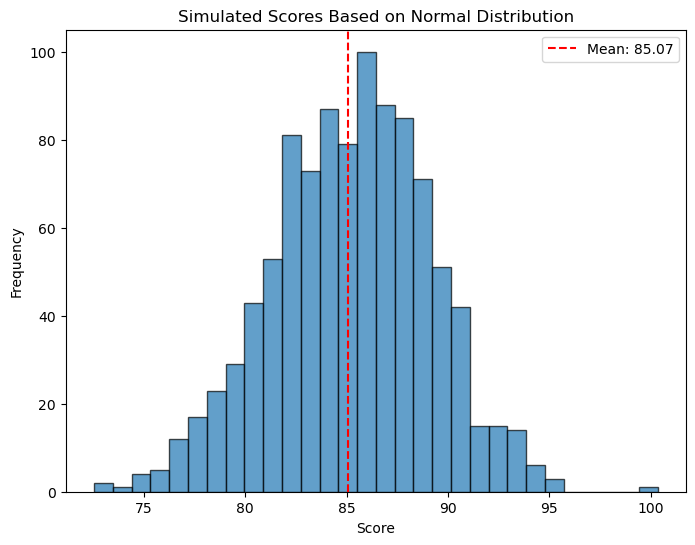

Summary Statistics for Actual Golf Scores:
               count       mean       std   min   25%   50%   75%   max
Score Numeric   42.0  85.071429  3.847032  78.0  83.0  85.0  88.0  94.0
Summary Statistics for Simulated Golf Scores:
                  count   mean   std    min    25%    50%    75%     max
Simulated Score  1000.0  85.22  3.93  72.54  82.58  85.42  87.99  100.35


In [ ]:
mean_score = df['Score Numeric'].mean()
std_score = df['Score Numeric'].std()

# perform a simulation with 1000 samples from a normal distribution
n_samples = 1000
simulated_scores = np.random.normal(mean_score, std_score, n_samples)

# plotting the distribution of simulated scores
plt.figure(figsize=(8, 6))
plt.hist(simulated_scores, bins=30, edgecolor='black', alpha=0.7)
plt.title("Simulated Scores Based on Normal Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.axvline(mean_score, color='red', linestyle='--', label=f'Mean: {mean_score:.2f}')
plt.legend()
plt.show()

# comparing stats for simulated vs actual
summary_stats = round(df['Score Numeric'].describe(),2)
print("Summary Statistics for Actual Golf Scores:")
print(summary_stats.to_frame().T)

df_simulated = pd.DataFrame({'Simulated Score': simulated_scores})
summary_sim = round(df_simulated['Simulated Score'].describe(),2)
print("Summary Statistics for Simulated Golf Scores:")
print(summary_sim.to_frame().T) 

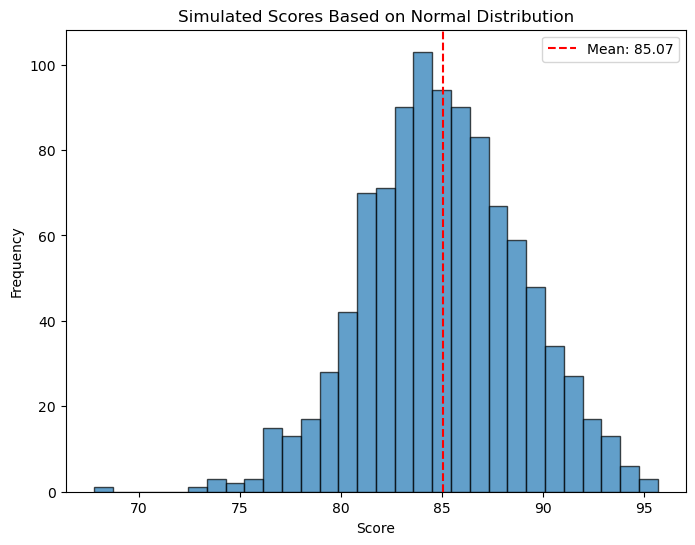

Summary Statistics for Actual Golf Scores:
               count       mean       std   min   25%   50%   75%   max
Score Numeric   42.0  85.071429  3.847032  78.0  83.0  85.0  88.0  94.0

First 5 rows of Simulated Scores:
   Simulated Score
0        86.393430
1        81.730247
2        86.852108
3        81.609061
4        82.951584


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your 'Score Numeric' column has already been processed

# Calculate the mean and standard deviation
mean_score = df['Score Numeric'].mean()
std_score = df['Score Numeric'].std()

# Perform a simulation with 1000 samples from a normal distribution
n_samples = 1000
simulated_scores = np.random.normal(mean_score, std_score, n_samples)

# Plotting the distribution of simulated scores
plt.figure(figsize=(8, 6))
plt.hist(simulated_scores, bins=30, edgecolor='black', alpha=0.7)
plt.title("Simulated Scores Based on Normal Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")

# Add a vertical line for the mean score
plt.axvline(mean_score, color='red', linestyle='--', label=f'Mean: {mean_score:.2f}')
plt.legend()
plt.show()

# If you want to include the simulated data in the DataFrame:
df_simulated = pd.DataFrame({'Simulated Score': simulated_scores})

# Display summary statistics for the original scores
summary_stats = df['Score Numeric'].describe()

# Print out the summary statistics in a clean format
print("Summary Statistics for Actual Golf Scores:")
print(summary_stats.to_frame().T)  # Transpose for better readability


In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your data
df['Score'] = df['Score'].str.extract('(\d+)').astype(float)  # Extract numeric values if needed

# Normality check - Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Score'], kde=True, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")

# Add a vertical line for the mean score
mean_score = df['Score'].mean()
plt.axvline(mean_score, color='red', linestyle='--', label=f'Mean: {mean_score:.2f}')
plt.legend()

plt.show()

# Display summary statistics in a table format
summary_stats = df['Score'].describe()
print("Summary Statistics for Golf Scores:")
print(summary_stats.to_frame().T)  # Transpose for better readability



KeyError: 'Score'